<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data" data-toc-modified-id="Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data</a></span><ul class="toc-item"><li><span><a href="#Target" data-toc-modified-id="Target-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Target</a></span></li><li><span><a href="#Categorical-features" data-toc-modified-id="Categorical-features-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Categorical features</a></span></li><li><span><a href="#Numerical-features" data-toc-modified-id="Numerical-features-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Numerical features</a></span></li></ul></li><li><span><a href="#Ultimate-tensile-strength--(MPa)" data-toc-modified-id="Ultimate-tensile-strength--(MPa)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Ultimate tensile strength  (MPa)</a></span><ul class="toc-item"><li><span><a href="#Tune-Best--Models-and-Plot" data-toc-modified-id="Tune-Best--Models-and-Plot-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Tune Best  Models and Plot</a></span><ul class="toc-item"><li><span><a href="#Light-Gradient-Boosting-Machine" data-toc-modified-id="Light-Gradient-Boosting-Machine-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Light Gradient Boosting Machine</a></span></li><li><span><a href="#Ridge-Regression" data-toc-modified-id="Ridge-Regression-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Ridge Regression</a></span></li></ul></li><li><span><a href="#Select-an-interval" data-toc-modified-id="Select-an-interval-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Select an interval</a></span></li></ul></li><li><span><a href="#Tensile-yield-strength-at-0.2%-offset--(MPa)" data-toc-modified-id="Tensile-yield-strength-at-0.2%-offset--(MPa)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Tensile yield strength at 0.2% offset  (MPa)</a></span></li></ul></div>

In [27]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import copy
from pycaret.regression import *
import pycaret 
import seaborn as sns 
# from pycaret.classification import *

In [2]:
import sklearn
print(sklearn.__version__)

0.23.2


## Data

In [3]:
data = pd.read_csv('Data_tensile/data_tensile_processed.csv')
data.head()

,temper method,Processing Method,Al Nominal,Si Nominal,Fe+Ni Nominal,Fe Nominal,Si+Fe Nominal,Si+Cu Nominal,Cu Nominal,Cd Nominal,Mn Nominal,Si+Mg Nominal,Mg Nominal,Mg2Si Nominal,Cr Nominal,Zn Nominal,Bi Nominal,Ti Nominal,V Nominal,V+Ti Nominal,W Nominal,Zr Nominal,Pb Nominal,Ni Nominal,Sn Nominal,Sb Nominal,Ag Nominal,Be Nominal,B Nominal,Li Nominal,Ga Nominal,Ultimate tensile strength (MPa),Tensile yield strength at 0.2% offset (MPa)
0,O,Wrought,99.775,0.125,0,0.000,0.0,0,0.025,0.0,0.025,0,0.025,0,0.0,0.000,0.0,0.000,0.025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76.0,28.0
1,H14,Wrought,99.775,0.125,0,0.000,0.0,0,0.025,0.0,0.025,0,0.025,0,0.0,0.000,0.0,0.000,0.025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110.0,105.0
2,H16,Wrought,99.775,0.125,0,0.000,0.0,0,0.025,0.0,0.025,0,0.025,0,0.0,0.000,0.0,0.000,0.025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130.0,125.0
3,H18,Wrought,99.775,0.125,0,0.000,0.0,0,0.025,0.0,0.025,0,0.025,0,0.0,0.000,0.0,0.000,0.025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160.0,145.0
4,O,Wrought,99.775,0.125,0,0.175,0.0,0,0.025,0.0,0.015,0,0.015,0,0.0,0.025,0.0,0.015,0.025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,28.0


### Target

In [4]:
target_col = ['Ultimate tensile strength  (MPa)','Tensile yield strength at 0.2% offset  (MPa)']
data[target_col].head()

,Ultimate tensile strength (MPa),Tensile yield strength at 0.2% offset (MPa)
0,76.0,28.0
1,110.0,105.0
2,130.0,125.0
3,160.0,145.0
4,69.0,28.0


In [5]:
categorical_cols_name = data.select_dtypes(exclude=np.number).columns.tolist()
numerics_cols_name = data.select_dtypes(include=np.number).columns.tolist()

### Categorical features

<AxesSubplot:>

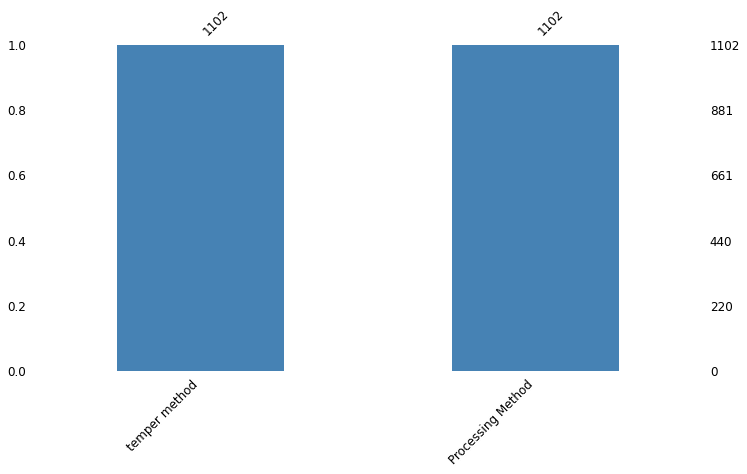

In [6]:
data_categorical = data[categorical_cols_name]
msno.bar(data_categorical, figsize=(12, 6), fontsize=12, color='steelblue')

### Numerical features

<AxesSubplot:>

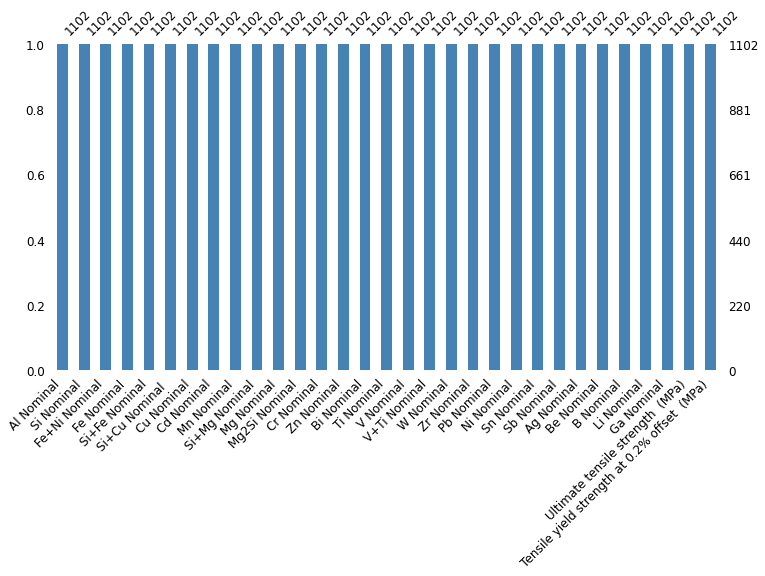

In [7]:
data_numerical = data[numerics_cols_name]
msno.bar(data_numerical, figsize=(12, 6), fontsize=12, color='steelblue')

##  Ultimate tensile strength  (MPa)

In [8]:
target_col

['Ultimate tensile strength  (MPa)',
 'Tensile yield strength at 0.2% offset  (MPa)']

In [9]:
numeric_features = copy.deepcopy(numerics_cols_name)
numeric_features.remove(target_col[0])
numeric_features.remove(target_col[1])
data_UT = copy.deepcopy(data)
data_UT.drop(target_col[1],axis=1, inplace=True)

In [10]:
import sklearn
print(sklearn.__version__)

0.23.2


In [11]:
exp_reg102 = setup(data = data_UT,target='Ultimate tensile strength  (MPa)',
                   session_id=123,
                   numeric_features =numeric_features,
                   train_size =0.8,
                   imputation_type='iterative',
                   normalize = True,
                  remove_multicollinearity = True, 
                   multicollinearity_threshold = 0.95, 
                     experiment_name = 'UT',
                   transform_target=True,
                   transform_target_method='yeo-johnson',
                   remove_outliers = True,
                   outliers_threshold= 0.5,
                   fold_shuffle=True) 

,Description,Value
0,session_id,123
1,Target,Ultimate tensile strength (MPa)
2,Original Data,"(1102, 32)"
3,Missing Values,False
4,Numeric Features,29
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(444, 45)"


In [12]:
# best=compare_models()
top3_models = compare_models(sort ='MAE',fold = 10, n_select = 3, exclude = ['ransac', 'huber'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,114.1438,21223.0908,145.4462,-0.0228,0.8477,1.1522,0.2330
catboost,CatBoost Regressor,114.1551,21526.0118,146.4589,-0.0379,0.8515,1.1489,0.4450
gbr,Gradient Boosting Regressor,114.3662,21269.1163,145.5787,-0.0257,0.8471,1.1530,0.0120
xgboost,Extreme Gradient Boosting,114.5879,21675.2949,146.9178,-0.0442,0.8549,1.1498,48.8940
et,Extra Trees Regressor,114.6155,21677.3159,146.9322,-0.0462,0.8550,1.1508,0.0280
ridge,Ridge Regression,114.7418,20974.9465,144.5450,-0.0024,0.8454,1.1708,0.0230
lr,Linear Regression,114.7496,21017.8857,144.6963,-0.0047,0.8463,1.1713,0.2610
rf,Random Forest Regressor,115.4217,21691.3394,147.0396,-0.0434,0.8535,1.1486,0.0320
br,Bayesian Ridge,116.4366,21093.9505,144.9516,-0.0050,0.8466,1.1798,0.0430
omp,Orthogonal Matching Pursuit,116.7876,21689.3739,146.9764,-0.0334,0.8635,1.2272,0.0070


### Tune Best  Models and Plot

#### Light Gradient Boosting Machine	

In [13]:
tuned_lightgbm = create_model('lightgbm', fold = 5, round = 2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,122.27,24709.61,157.19,-0.13,0.81,0.91
1,98.01,17659.84,132.89,0.15,0.73,0.86
2,119.58,22506.86,150.02,-0.07,0.81,0.97
3,116.13,21160.67,145.47,-0.18,0.95,1.47
4,115.49,20237.35,142.26,0.17,0.96,1.55
Mean,114.29,21254.87,145.57,-0.01,0.85,1.15
SD,8.50,2343.98,8.08,0.15,0.09,0.30


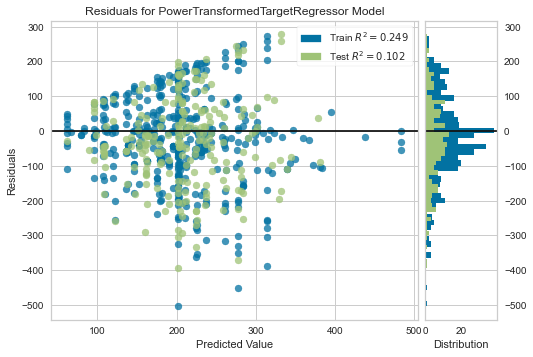

In [15]:
plot_model(tuned_lightgbm )

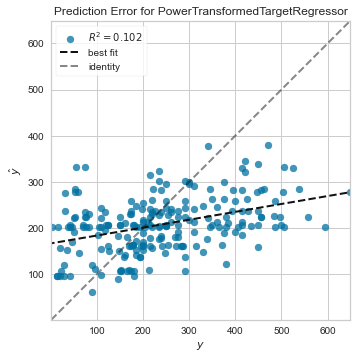

In [16]:
plot_model(tuned_lightgbm, plot = 'error')

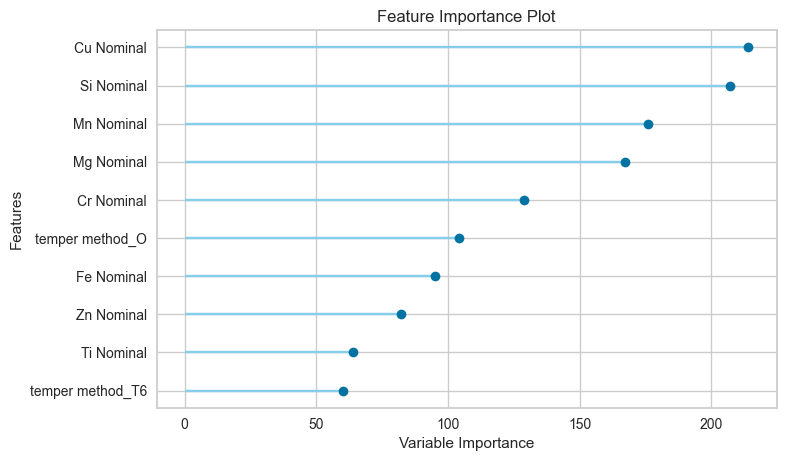

In [17]:
plot_model(tuned_lightgbm, plot='feature')

#### Ridge Regression

In [18]:
tuned_ridge = create_model('ridge', fold = 5, round = 2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,127.70,24264.89,155.77,-0.11,0.80,0.95
1,104.36,19171.40,138.46,0.07,0.76,0.93
2,115.58,22163.90,148.88,-0.06,0.80,0.94
3,108.88,17590.03,132.63,0.02,0.91,1.46
4,121.38,22833.26,151.11,0.07,0.99,1.64
Mean,115.58,21204.70,145.37,-0.00,0.85,1.18
SD,8.38,2455.08,8.53,0.07,0.09,0.31


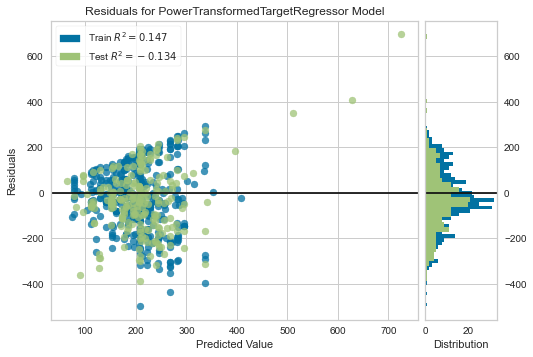

In [19]:
plot_model(tuned_ridge )

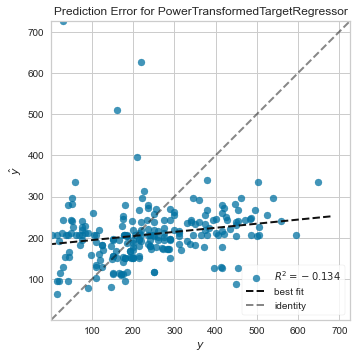

In [20]:
plot_model(tuned_ridge, plot = 'error')

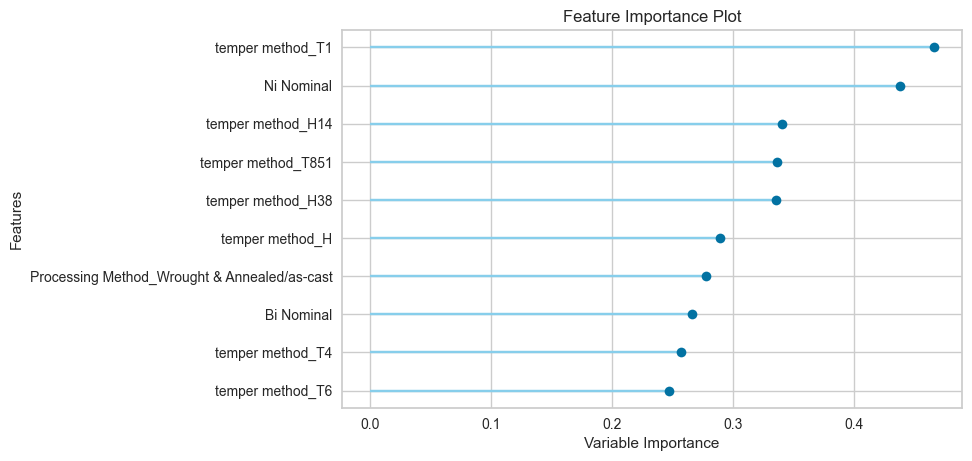

In [21]:
plot_model(tuned_ridge, plot='feature')

In [22]:
#### AdaBoost Regressor

In [23]:
tuned_ada = create_model('ada', fold = 5, round = 2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,134.48,27589.99,166.10,-0.26,0.82,0.85
1,109.03,20089.06,141.74,0.03,0.75,0.88
2,125.04,23560.52,153.49,-0.12,0.82,1.00
3,111.65,18490.63,135.98,-0.03,0.90,1.35
4,123.92,21809.99,147.68,0.11,0.96,1.51
Mean,120.82,22308.04,149.00,-0.06,0.85,1.12
SD,9.35,3137.27,10.36,0.13,0.07,0.26


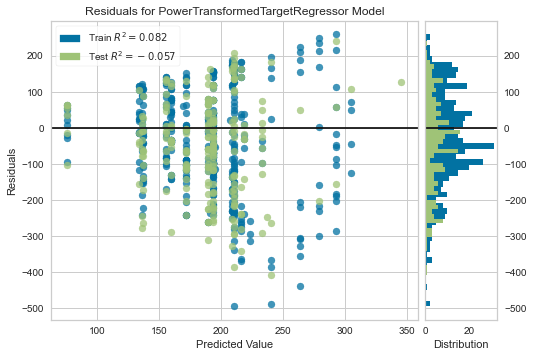

In [24]:
plot_model(tuned_ada )

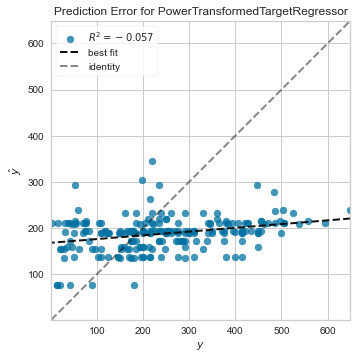

In [25]:
plot_model(tuned_ada, plot = 'error')

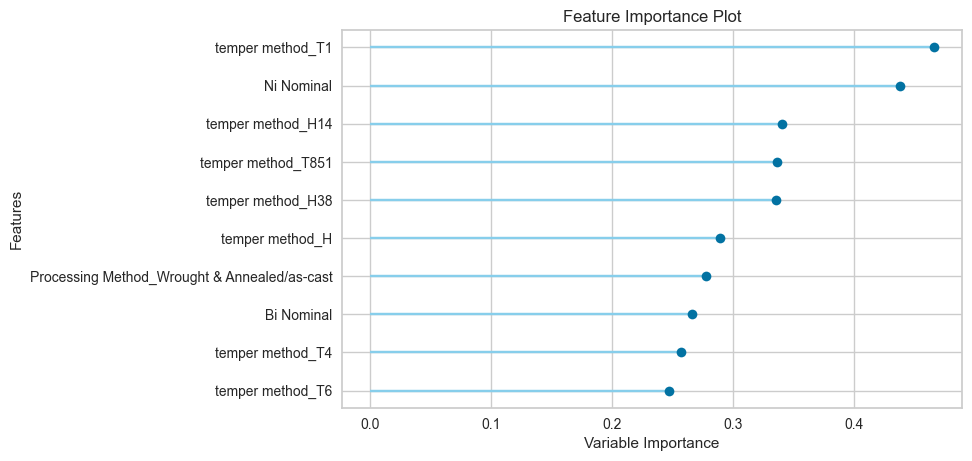

In [26]:
plot_model(tuned_ridge, plot='feature')

### Select an interval 

<AxesSubplot:xlabel='Ultimate tensile strength  (MPa)', ylabel='Density'>

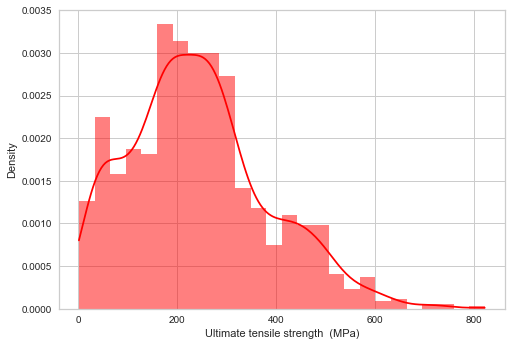

In [28]:
sns.histplot(data_UT[target_col[0]], color="red", label="100% Equities", kde=True, stat="density", linewidth=0)

<AxesSubplot:xlabel='Ultimate tensile strength  (MPa)', ylabel='Density'>

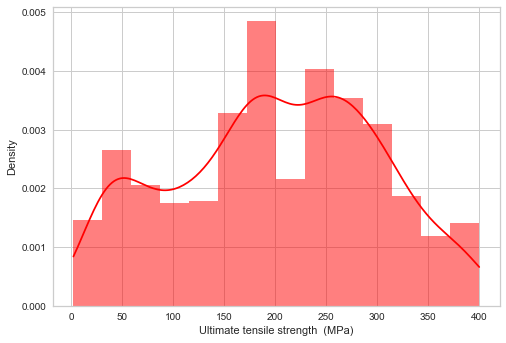

In [32]:
data_subset = data_UT.loc[(data_UT[target_col[0]] <= 400)] #& (df['column_name'] <= 200)]
sns.histplot(data_subset[target_col[0]], color="red", label="100% Equities", kde=True, stat="density", linewidth=0)

In [36]:
exp_reg102 = setup(data = data_UT,target='Ultimate tensile strength  (MPa)',
                   session_id=123,
                   numeric_features =numeric_features,
                   train_size =0.8,
                   imputation_type='iterative',
                   normalize = True,
                remove_multicollinearity = True, 
                   multicollinearity_threshold = 0.95,
#                    use_gpu=True,
                     experiment_name = 'UT',
                   transform_target=True,
#                    transform_target_method='yeo-johnson',
                   fold_shuffle=True) 

,Description,Value
0,session_id,123
1,Target,Ultimate tensile strength (MPa)
2,Original Data,"(1102, 32)"
3,Missing Values,False
4,Numeric Features,29
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(881, 128)"


In [37]:
top3_models = compare_models(sort ='MAE',fold = 10, n_select = 3, exclude = ['ransac', 'huber'])

IntProgress(value=0, description='Processing: ', max=89)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:10:18
Status,. . . . . . . . . . . . . . . . . .,Compiling Final Models
Estimator,. . . . . . . . . . . . . . . . . .,Extreme Gradient Boosting


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0120
catboost,CatBoost Regressor,88.1660,14794.5740,121.1823,0.2332,0.6951,0.8299,1.0440
et,Extra Trees Regressor,88.7147,15545.2247,124.2383,0.1918,0.7066,0.8298,0.2970
rf,Random Forest Regressor,90.8564,15574.6156,124.4422,0.1910,0.7057,0.8378,0.3120
ridge,Ridge Regression,92.0026,15685.8320,124.8821,0.1823,0.7092,0.8675,0.0180
lightgbm,Light Gradient Boosting Machine,92.2851,15706.7096,125.0898,0.1821,0.7035,0.8498,0.0760
dt,Decision Tree Regressor,94.5425,16648.7487,128.5647,0.1339,0.7209,0.8543,0.0110
gbr,Gradient Boosting Regressor,94.7188,15674.0087,124.7855,0.1905,0.7060,0.8750,0.1310
omp,Orthogonal Matching Pursuit,97.2312,16631.8115,128.4813,0.1398,0.7194,0.8996,0.0180
br,Bayesian Ridge,98.3418,16784.6001,129.1993,0.1322,0.7195,0.8993,0.0620


XGBoostError: [23:10:46] ../src/c_api/../data/../common/common.h:45: ../src/c_api/../data/../common/device_helpers.cuh: 151: cudaErrorDevicesUnavailable: all CUDA-capable devices are busy or unavailable
Stack trace:
  [bt] (0) /home/ctetsass/python/spinel_oer/.venv/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0x315469) [0x7faee0a08469]
  [bt] (1) /home/ctetsass/python/spinel_oer/.venv/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0x318d13) [0x7faee0a0bd13]
  [bt] (2) /home/ctetsass/python/spinel_oer/.venv/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0x3190bc) [0x7faee0a0c0bc]
  [bt] (3) /home/ctetsass/python/spinel_oer/.venv/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0x34d4b9) [0x7faee0a404b9]
  [bt] (4) /home/ctetsass/python/spinel_oer/.venv/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0x35d085) [0x7faee0a50085]
  [bt] (5) /home/ctetsass/python/spinel_oer/.venv/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0x35dc09) [0x7faee0a50c09]
  [bt] (6) /home/ctetsass/python/spinel_oer/.venv/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0x35de53) [0x7faee0a50e53]
  [bt] (7) /home/ctetsass/python/spinel_oer/.venv/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0x479552) [0x7faee0b6c552]
  [bt] (8) /home/ctetsass/python/spinel_oer/.venv/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0x179899) [0x7faee086c899]



## Tensile yield strength at 0.2% offset  (MPa)

In [ ]:
numeric_features = copy.deepcopy(numerics_cols_name)
data_TY = copy.deepcopy(data)

data_TY = data_TY.drop(target_col[0],axis=1, inplace=True)

In [ ]:
exp_reg102 = setup(data = data_TY,target=target_col[1],
                   session_id=123,
                   numeric_features =numeric_features,
                   train_size =0.8,
                   imputation_type='iterative',
                   normalize = True,
#                   remove_multicollinearity = True, 
#                    multicollinearity_threshold = 0.95, 
                     experiment_name = 'TY',
                   transform_target=True,
                   transform_target_method='yeo-johnson',
                   remove_outliers = True,
                   outliers_threshold= 0.5,
                   fold_shuffle=True) 